In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   # interactive mode


In [2]:
from functions_pretrained import get_image_data, finetune_conv_net, save_outputs, run_pretrained_nn

In [3]:
BATCH_SIZE = 32
NUM_EPOCHS = 15

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Set up

In [4]:
data_transforms = {
    'train': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '../data/5_BW_Train_Test_Folder'

# ResNet

In [5]:
#resnet_18 = models.resnet18(pretrained=True)
    
#num_ftrs = resnet_18.fc.in_features
#resnet_18.fc = nn.Linear(num_ftrs, 2)

#run_pretrained_nn(resnet_18, 'test_resnet', device, data_dir, data_transforms, NUM_EPOCHS, BATCH_SIZE)

# Alex net

C:\Users\gv9\AppData\Local\pypoetry\Cache\virtualenvs\christmas-jumper-classification-E2xsjmAv-py3.9\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\gv9\AppData\Local\pypoetry\Cache\virtualenvs\christmas-jumper-classification-E2xsjmAv-py3.9\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Finetuning Conv Net
Epoch 0/14
----------
train Loss: 0.4588 Acc: 0.7863
test Loss: 0.1675 Acc: 0.9528

Epoch 1/14
----------
train Loss: 0.1749 Acc: 0.9389
test Loss: 0.1000 Acc: 0.9528

Epoch 2/14
----------
train Loss: 0.1277 Acc: 0.9580
test Loss: 0.0787 Acc: 0.9528

Epoch 3/14
----------
train Loss: 0.0874 Acc: 0.9695
test Loss: 0.0739 Acc: 0.9528

Epoch 4/14
----------
train Loss: 0.0796 Acc: 0.9656
test Loss: 0.0786 Acc: 0.9623

Epoch 5/14
----------
train Loss: 0.0576 Acc: 0.9809
test Loss: 0.0704 Acc: 0.9528

Epoch 6/14
----------
train Loss: 0.0429 Acc: 0.9847
test Loss: 0.0823 Acc: 0.9623

Epoch 7/14
----------
train Loss: 0.0487 Acc: 0.9847
test Loss: 0.0815 Acc: 0.9623

Epoch 8/14
----------
train Loss: 0.0301 Acc: 0.9962
test Loss: 0.0784 Acc: 0.9623

Epoch 9/14
----------
train Loss: 0.0392 Acc: 0.9847
test Loss: 0.0771 Acc: 0.9623

Epoch 10/14
----------
train Loss: 0.0372 Acc: 0.9962
test Loss: 0.0759 Acc: 0.9623

Epoch 11/14
----------
train Loss: 0.0228 Acc: 0.9962
t

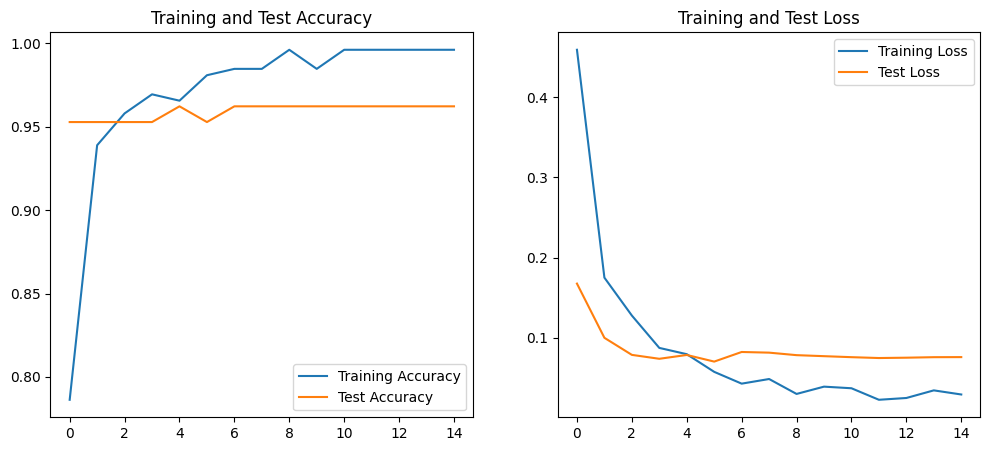

In [6]:
alex_net = models.alexnet(pretrained=True)

alex_net.classifier[6] = nn.Linear(4096, 2)

run_pretrained_nn(alex_net, 'alexnet', device, data_dir, data_transforms, NUM_EPOCHS, BATCH_SIZE)

# VGG

C:\Users\gv9\AppData\Local\pypoetry\Cache\virtualenvs\christmas-jumper-classification-E2xsjmAv-py3.9\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Finetuning Conv Net
Epoch 0/14
----------
train Loss: 0.6191 Acc: 0.6565
test Loss: 0.4068 Acc: 0.8962

Epoch 1/14
----------
train Loss: 0.3582 Acc: 0.8893
test Loss: 0.1818 Acc: 0.9717

Epoch 2/14
----------
train Loss: 0.1892 Acc: 0.9427
test Loss: 0.1139 Acc: 0.9623

Epoch 3/14
----------
train Loss: 0.1256 Acc: 0.9580
test Loss: 0.0954 Acc: 0.9623

Epoch 4/14
----------
train Loss: 0.1078 Acc: 0.9618
test Loss: 0.0961 Acc: 0.9528

Epoch 5/14
----------
train Loss: 0.0858 Acc: 0.9580
test Loss: 0.1105 Acc: 0.9623

Epoch 6/14
----------
train Loss: 0.0612 Acc: 0.9771
test Loss: 0.0948 Acc: 0.9623

Epoch 7/14
----------
train Loss: 0.0570 Acc: 0.9809
test Loss: 0.0959 Acc: 0.9623

Epoch 8/14
----------
train Loss: 0.0428 Acc: 0.9962
test Loss: 0.0973 Acc: 0.9717

Epoch 9/14
----------
train Loss: 0.0398 Acc: 0.9885
test Loss: 0.0979 Acc: 0.9717

Epoch 10/14
----------
train Loss: 0.0411 Acc: 0.9924
test Loss: 0.0979 Acc: 0.9717

Epoch 11/14
----------
train Loss: 0.0402 Acc: 0.9885
t

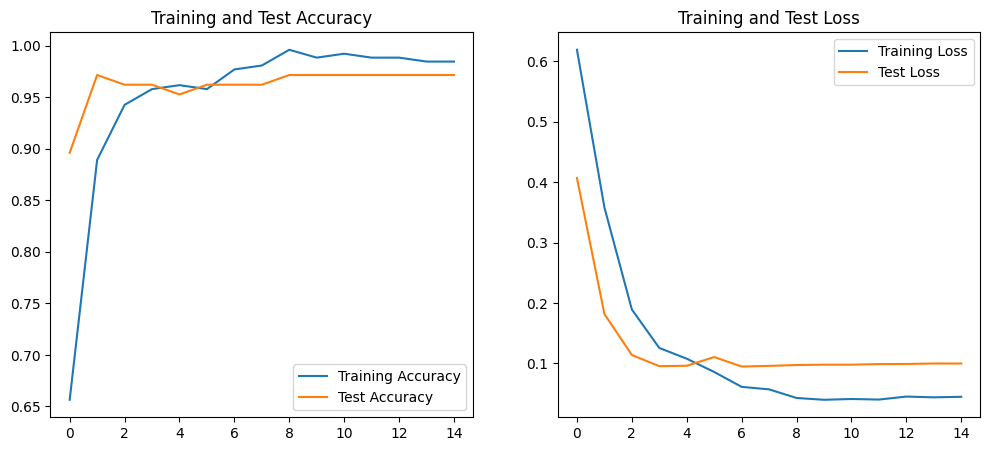

In [7]:
vgg = models.vgg16(pretrained=True)

vgg.classifier[6] = nn.Linear(4096, 2)

run_pretrained_nn(vgg, 'vgg', device, data_dir, data_transforms, NUM_EPOCHS, BATCH_SIZE)

# GoogLeNet

In [12]:
googlenet = models.googlenet(pretrained=True)
googlenet.fc = nn.Linear(1024, 2)

run_pretrained_nn(googlenet, 'googlenet', device, data_dir, data_transforms, NUM_EPOCHS, BATCH_SIZE)

TypeError: run_pretrained_nn() got an unexpected keyword argument 'return_model'

In [5]:
googlenet = models.googlenet(pretrained=True)
googlenet.fc = nn.Linear(1024, 2)

final_model = run_pretrained_nn(googlenet, 'googlenet', device, data_dir, data_transforms, NUM_EPOCHS, BATCH_SIZE, return_model=True)

C:\Users\gv9\AppData\Local\pypoetry\Cache\virtualenvs\christmas-jumper-classification-Gg-1bJG6-py3.9\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\gv9\AppData\Local\pypoetry\Cache\virtualenvs\christmas-jumper-classification-Gg-1bJG6-py3.9\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Finetuning Conv Net
Epoch 0/14
----------
train Loss: 0.6790 Acc: 0.5649
test Loss: 0.6250 Acc: 0.7453

Epoch 1/14
----------
train Loss: 0.5396 Acc: 0.8359
test Loss: 0.5016 Acc: 0.8208

Epoch 2/14
----------
train Loss: 0.4068 Acc: 0.9008
test Loss: 0.3896 Acc: 0.9245

Epoch 3/14
----------
train Loss: 0.3380 Acc: 0.9084
test Loss: 0.2838 Acc: 0.9717

Epoch 4/14
----------
train Loss: 0.2364 Acc: 0.9504
test Loss: 0.2137 Acc: 0.9717

Epoch 5/14
----------
train Loss: 0.2078 Acc: 0.9427
test Loss: 0.2005 Acc: 0.9245

Epoch 6/14
----------
train Loss: 0.1521 Acc: 0.9809
test Loss: 0.1580 Acc: 0.9906

Epoch 7/14
----------
train Loss: 0.1485 Acc: 0.9733
test Loss: 0.1571 Acc: 0.9906

Epoch 8/14
----------
train Loss: 0.1337 Acc: 0.9733
test Loss: 0.1563 Acc: 0.9906

Epoch 9/14
----------
train Loss: 0.1388 Acc: 0.9771
test Loss: 0.1565 Acc: 0.9906

Epoch 10/14
----------
train Loss: 0.1464 Acc: 0.9733
test Loss: 0.1560 Acc: 0.9906

Epoch 11/14
----------
train Loss: 0.1399 Acc: 0.9771
t

# Final Validation

In [51]:
from pathlib import Path
import torchvision.transforms as T
from PIL import Image

transform_errors = T.ToPILImage()

running_corrects = 0

true_positives = 0
true_negatives = 0
false_positives = 0
false_negatives = 0

validation_data_path = Path('..', 'data', '5_BW_Train_Test_Folder', 'val')

image_dataset = datasets.ImageFolder(validation_data_path, transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]))

dataloader = torch.utils.data.DataLoader(
            image_dataset, batch_size=1, shuffle=True, num_workers=4)

1
2
3
4
5
6
7
tensor([0]) tensor([1])


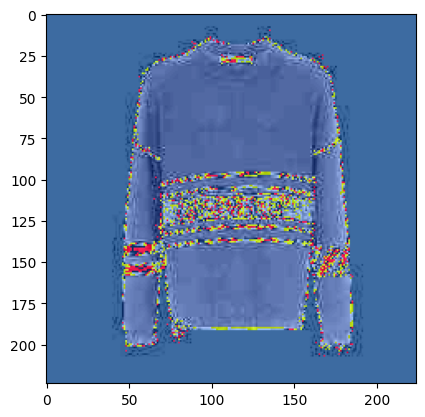

7
8
tensor([0]) tensor([1])


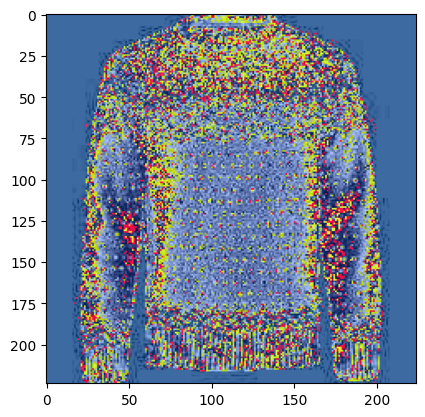

8
tensor([1]) tensor([0])


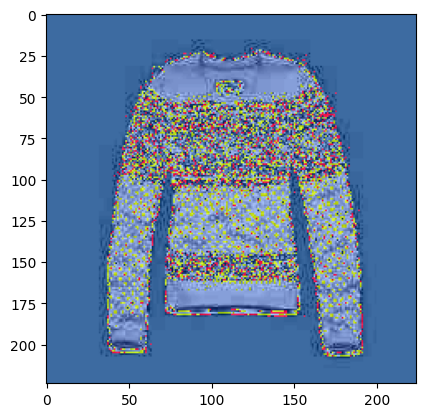

8
9
10
11
12
13
14
15
tensor([1]) tensor([0])


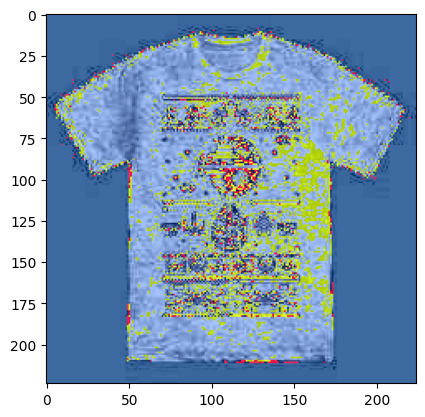

15
16
17
18
19
tensor([0]) tensor([1])


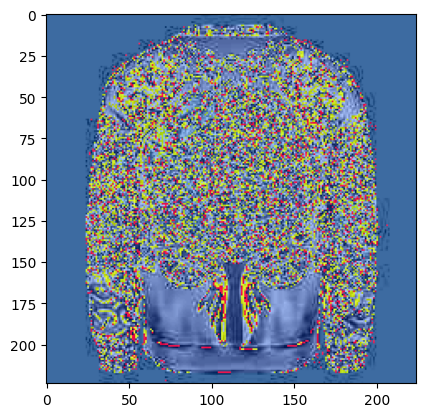

19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
tensor([1]) tensor([0])


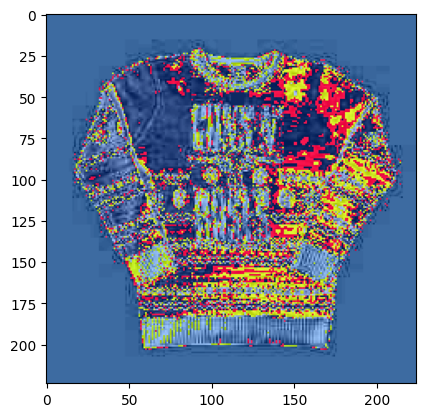

42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
tensor([0]) tensor([1])


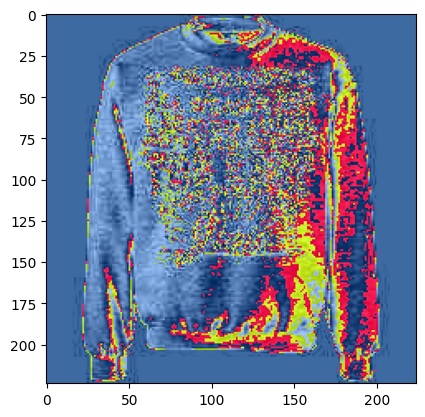

63
64
65
66
67
tensor([0]) tensor([1])


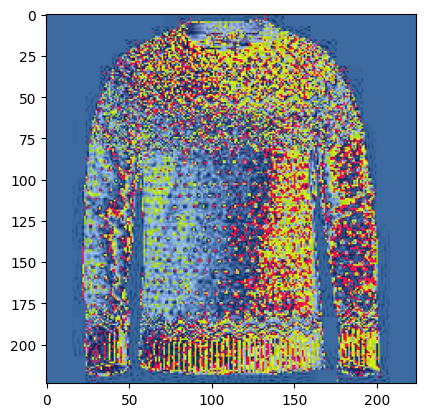

67
tensor([0]) tensor([1])


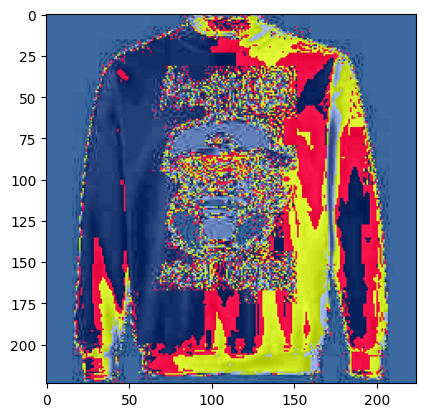

67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
tensor([0]) tensor([1])


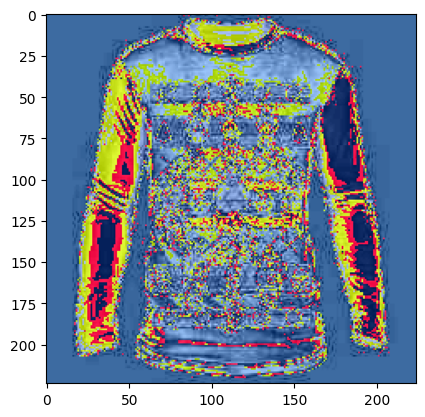

105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
93.67088607594937 final_accuracy
true_positives  77
true_negatives  71
false_positives  3
false_negatives  7
(1) = normal, (0)=christmsas


In [52]:
for inputs, labels in dataloader:
    inputs = inputs.to(device)
    labels = labels.to(device)

    outputs = final_model(inputs)
    _, preds = torch.max(outputs, 1)
    
    #If predicted correctly:
    if preds == labels.data:
        #add to correct
        running_corrects += 1
        if preds==1:
            true_positives +=1
        else:
            true_negatives +=1
        
    # If not prediced correctly
    else:
        #visualise image
        print(preds, labels.data)
        img = transform_errors(inputs[0])
        plt.imshow(img)
        plt.show()
        #img.save(Path('..', 'outptus', 'incorrect_on_validation'))
        
        if preds==1:
            false_positives+=1
        else:
            false_negatives+=1

    print(running_corrects)
    
    
final_accuracy = (running_corrects / len(dataloader))*100

print(final_accuracy, 'final_accuracy')
print('true_positives ', true_positives)
print('true_negatives ', true_negatives)
print('false_positives ', false_positives)
print('false_negatives ', false_negatives)

print('(1) = normal, (0)=christmsas')